In [1]:
import sys
import warnings

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py3Dmol
import seaborn as sns
import torch
from matplotlib.colorbar import ColorbarBase
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_hex
from sklearn.metrics import roc_curve

warnings.filterwarnings("ignore")
sys.path.append("MotifAE_G")
from model import AutoEncoder, GatedAutoEncoder

sns.set(font_scale=1.2)
sns.set_style("white")
base_cmap = plt.get_cmap("tab20")
alter_cmap = plt.get_cmap("tab20c")

In [2]:
STORAGE_BASE = "/nfs/user/Users/dl3738/SAE"

MODEL_NAME = "MotifAE"
STD_MODEL_NAME = "SAE"
GATE_MODEL_NAME = "MotifAE-G"

MODEL_BASE = f"{STORAGE_BASE}/checkpoints/gated_SAE"
BENCHMARK_BASE = f"{STORAGE_BASE}/benchmark"
SOURCE_DATA_BASE = f"{STORAGE_BASE}/data/source_data"

STAB_CHK = "2150"
STAB_STRUC_BASE = f"{STORAGE_BASE}/domain_af2_structure"

RSA_NORMALIZE = {
    "A": 1.29,
    "R": 2.74,
    "N": 1.95,
    "D": 1.93,
    "C": 1.67,
    "Q": 2.25,
    "E": 2.23,
    "G": 1.04,
    "H": 2.24,
    "I": 1.97,
    "L": 2.01,
    "K": 2.36,
    "M": 2.24,
    "F": 2.40,
    "P": 1.59,
    "S": 1.55,
    "T": 1.72,
    "W": 2.85,
    "Y": 2.63,
    "V": 1.74,
}

# Set colors

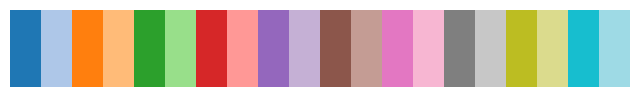

In [3]:
plt.figure(figsize=(8, 1))
plt.imshow([base_cmap(range(base_cmap.N))], aspect="auto")
plt.axis("off")
plt.show()

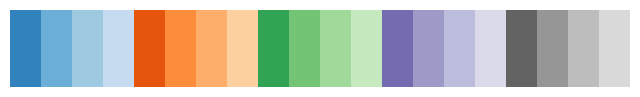

In [4]:
plt.figure(figsize=(8, 1))
plt.imshow([alter_cmap(range(alter_cmap.N))], aspect="auto")
plt.axis("off")
plt.show()

In [5]:
# set general color
unactivate_color = to_hex(base_cmap(15))
activation_cmap = LinearSegmentedColormap.from_list("custom", colors=["#ffffff", to_hex(base_cmap(18))], N=256)

# set interaction color
interact_color = to_hex(base_cmap(1))
# set stab color
stab_cmap = LinearSegmentedColormap.from_list("stab_cmap", [base_cmap(0), (1, 1, 1), base_cmap(6)], N=256)
# set enzyme color
annotate_color = to_hex(base_cmap(1))
ligand_color = to_hex(base_cmap(3))

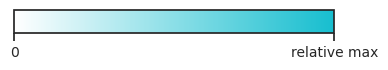

In [6]:
fig, ax = plt.subplots(figsize=(8, 0.3))
fig.subplots_adjust(left=0.5)

cb = ColorbarBase(
    ax,
    cmap=activation_cmap,
    orientation="horizontal",
    ticks=[0, 1],
    boundaries=None,
    spacing="proportional",
)

cb.ax.set_xticklabels([0, "relative max"])
cb.set_label(None)
cb.ax.tick_params(labelsize=10)

plt.show()

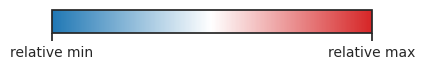

In [7]:
fig, ax = plt.subplots(figsize=(8, 0.3))
fig.subplots_adjust(left=0.5)

cb = ColorbarBase(
    ax,
    cmap=stab_cmap,
    orientation="horizontal",
    ticks=[0, 1],
    boundaries=None,
    spacing="proportional",
)
cb.ax.set_xticklabels(["relative min", "relative max"])
cb.set_label(None)
cb.ax.tick_params(labelsize=10)

plt.show()

# MotifAE

## L2 loss

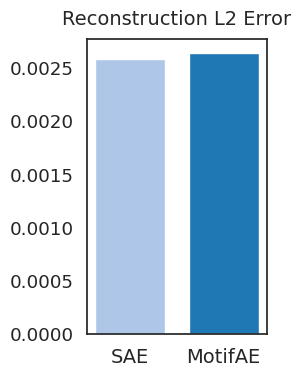

In [8]:
heights = [3.308 / 1280, 3.378 / 1280]

plt.figure(figsize=(3, 4))
plt.bar([0, 1], heights, color=base_cmap([1, 0]), width=0.75)
plt.title("Reconstruction L2 Error", fontsize=14, y=1.02)
plt.xticks([0, 1], ["SAE", "MotifAE"], fontsize=14)
plt.tight_layout()
plt.show()

## Clinvar

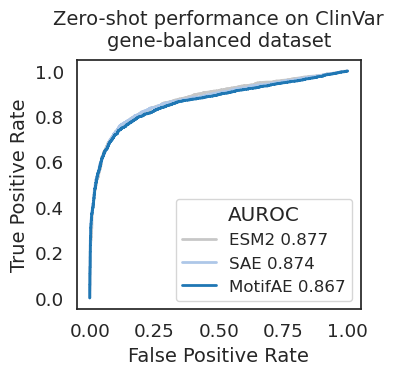

In [9]:
b_clinvar = pd.read_csv(f"{SOURCE_DATA_BASE}/clinvar_genebalanced_207genes_4544muts.csv")

scores = ["ESM2_llr", "sae_250416", "sae_250417"]
colors = [15, 1, 0]

plt.figure(figsize=(4, 4))

y_true = b_clinvar["score"]

for i in range(len(scores)):
    y_pred = b_clinvar[scores[i]]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr, color=base_cmap(colors[i]), lw=2)

plt.legend(["ESM2 0.877", "SAE 0.874", "MotifAE 0.867"], loc="lower right", title="AUROC", fontsize=12)
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)
plt.title("Zero-shot performance on ClinVar\ngene-balanced dataset", fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

## ProteinGYM

In [10]:
df = pd.read_csv(f"{SOURCE_DATA_BASE}/proteingym_zero_shot_esm2_motifae.csv")

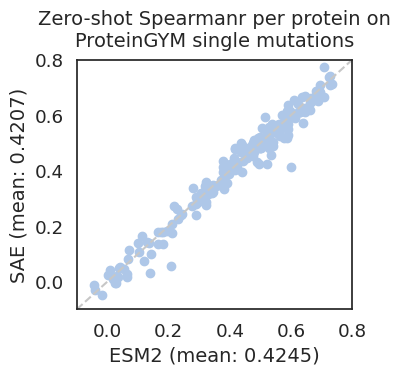

In [12]:
show_lim = [-0.1, 0.8]
plt.figure(figsize=(4, 4))
plt.plot(show_lim, show_lim, color=base_cmap(15), linestyle="--")
plt.scatter(df["esm2"], df["sae_250416"], color=base_cmap(1))
plt.xlabel("ESM2 (mean: 0.4245)", fontsize=14)
plt.ylabel(f"{STD_MODEL_NAME} (mean: 0.4207)", fontsize=14)
plt.title("Zero-shot Spearmanr per protein on\nProteinGYM single mutations", fontsize=14, y=1.02)
plt.xlim(show_lim)
plt.ylim(show_lim)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])
plt.tight_layout()
plt.show()

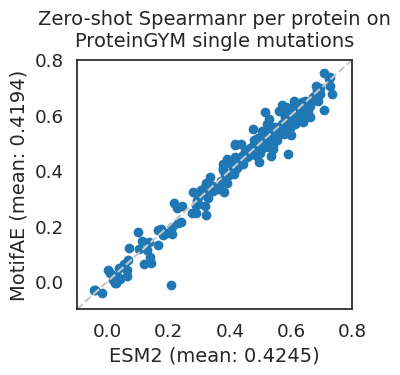

In [ ]:
show_lim = [-0.1, 0.8]
plt.figure(figsize=(4, 4))
plt.plot(show_lim, show_lim, color=base_cmap(15), linestyle="--")
plt.scatter(df["esm2"], df["sae_250417"], color=base_cmap(0))
plt.xlabel("ESM2 (mean: 0.4245)", fontsize=14)
plt.ylabel(f"{MODEL_NAME} (mean: 0.4194)", fontsize=14)
plt.title("Zero-shot Spearmanr per protein on\nProteinGYM single mutations", fontsize=14, y=1.02)
plt.xlim(show_lim)
plt.ylim(show_lim)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8])
plt.yticks([0, 0.2, 0.4, 0.6, 0.8])
plt.tight_layout()
plt.show()

# Stability

In [10]:
motifaeg_stab_train = pd.read_csv(
    f"{MODEL_BASE}/spearman_l1_10e-6_llr/res/train_infer_res_step_{STAB_CHK}.csv", index_col=0
)
motifaeg_stab_train["domainID"] = motifaeg_stab_train.index.str.rsplit("_", n=1).str[0]
motifaeg_stab_test = pd.read_csv(
    f"{MODEL_BASE}/spearman_l1_10e-6_llr/res/test_infer_res_step_{STAB_CHK}.csv", index_col=0
)
motifaeg_stab_test["domainID"] = motifaeg_stab_test.index.str.rsplit("_", n=1).str[0]
esm2_stab_all = pd.read_csv(f"{BENCHMARK_BASE}/domain_stab_all_llr/esm2_inference_res.csv", index_col=0)
esm2_stab_all["domainID"] = esm2_stab_all.index.str.rsplit("_", n=1).str[0]
sae_stab_all = pd.read_csv(f"{BENCHMARK_BASE}/domain_stab_all_llr/standard_sae_inference_res.csv", index_col=0)
sae_stab_all["domainID"] = sae_stab_all.index.str.rsplit("_", n=1).str[0]
random_stab_all = pd.read_csv(
    f"{BENCHMARK_BASE}/domain_stab_all_llr/random_mask/random_gate_model_9.csv", index_col=0
)
random_stab_all["domainID"] = random_stab_all.index.str.rsplit("_", n=1).str[0]

## pairwise comparison between MotifAE and ESM2

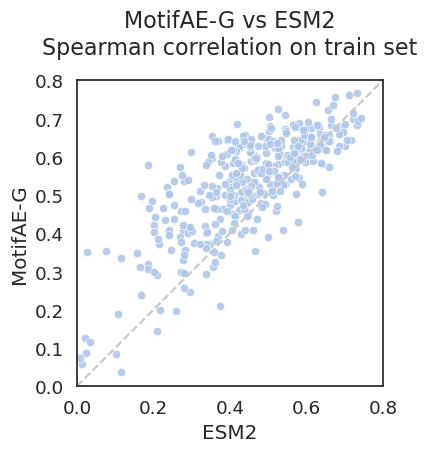

In [11]:
# get data
plot_df = motifaeg_stab_train.copy()
plot_df["esm2"] = esm2_stab_all["pred"]
plot_df["domainID"] = plot_df.index.str.rsplit("_", n=1).str[0]
plot_df = plot_df.groupby("domainID").apply(lambda x: x.corr("spearman").iloc[2:4, 1])

# plot
ax = sns.scatterplot(data=plot_df, x="esm2", y="pred", alpha=0.9, color=base_cmap(1))
ax.plot([0, 0.8], [0, 0.8], linestyle="--", color=base_cmap(15))
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.8)
ax.set_xlabel("ESM2")
ax.set_ylabel(GATE_MODEL_NAME)
ax.set_aspect("equal")
ax.set_title(f"{GATE_MODEL_NAME} vs ESM2\nSpearman correlation on train set", fontsize=16, y=1.06)

plt.tight_layout()

plt.show()

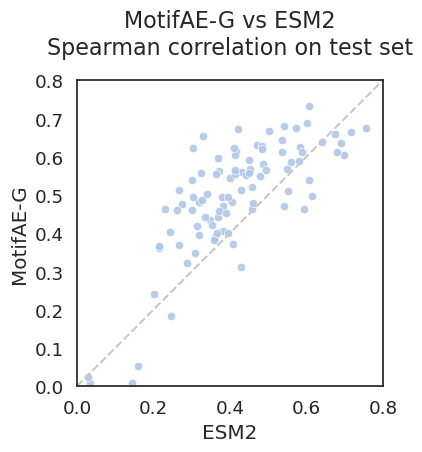

In [12]:
# get data
plot_df = motifaeg_stab_test.copy()
plot_df["esm2"] = esm2_stab_all["pred"]
plot_df["domainID"] = plot_df.index.str.rsplit("_", n=1).str[0]
plot_df = plot_df.groupby("domainID").apply(lambda x: x.corr("spearman").iloc[2:4, 1])

# plot
ax = sns.scatterplot(data=plot_df, x="esm2", y="pred", alpha=0.9, color=base_cmap(1))
ax.plot([0, 0.8], [0, 0.8], linestyle="--", color=base_cmap(15))
ax.set_xlim(0, 0.8)
ax.set_ylim(0, 0.8)
ax.set_xlabel("ESM2")
ax.set_ylabel(GATE_MODEL_NAME)
ax.set_aspect("equal")
ax.set_title(f"{GATE_MODEL_NAME} vs ESM2\nSpearman correlation on test set", fontsize=16, y=1.06)

plt.tight_layout()

plt.show()

## box plot showing different model performance difference on test set

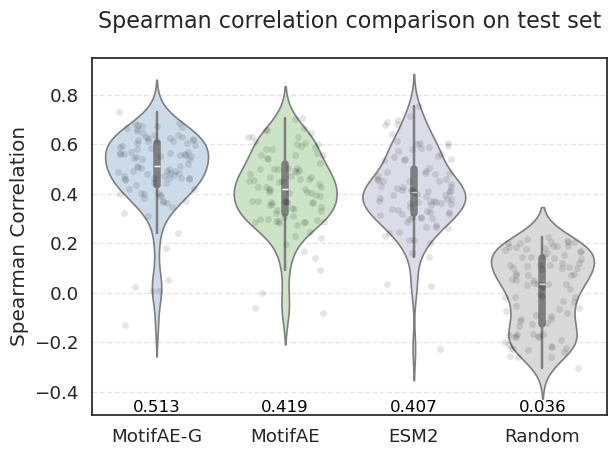

In [13]:
plot_df = motifaeg_stab_test.copy()
plot_df["esm2"] = esm2_stab_all["pred"]
plot_df["sae"] = sae_stab_all["pred"]
plot_df["random"] = random_stab_all["pred"]
plot_df["domainID"] = plot_df.index.str.rsplit("_", n=1).str[0]
plot_df = plot_df.groupby("domainID").apply(lambda x: x.corr("spearman").iloc[2:6, 1])

plot_df = plot_df.melt(var_name="Method", value_name="Spearman Correlation")
plot_df["Method"] = plot_df["Method"].map({"pred": GATE_MODEL_NAME, "esm2": "ESM2", "sae": MODEL_NAME, "random": "Random"})
median_values = plot_df.groupby("Method")["Spearman Correlation"].median().sort_values(ascending=False)
plot_df["Method"] = pd.Categorical(plot_df["Method"], categories=median_values.index, ordered=True)

# plot
ax = sns.violinplot(
    data=plot_df,
    x="Method",
    y="Spearman Correlation",
    order=median_values.index,
    linewidth=1.2,
    density_norm="width",
    palette=[alter_cmap(3), alter_cmap(11), alter_cmap(15), alter_cmap(19)],
    legend=False,
)
sns.stripplot(
    data=plot_df,
    x="Method",
    y="Spearman Correlation",
    order=median_values.index,
    color="black",
    alpha=0.1,
    jitter=0.3,
    ax=ax
)
# add median value
ymin, ymax = ax.get_ylim()
y_text = ymin + (ymax - ymin) * 0.02
for i, method in enumerate(median_values.index):
    median = median_values[method]
    ax.text(i, y_text, f"{median:.3f}", ha="center", va="center", fontsize=12, color="black")
ax.set_xlabel(None)
ax.set_ylabel("Spearman Correlation")
ax.set_title("Spearman correlation comparison on test set", fontsize=16, y=1.06)
ax.grid(axis="y", linestyle="--", alpha=0.5)

plt.tight_layout()

plt.show()

## RSA Anlysis

In [14]:
def bootstrap_single(available_res, lower_quantile=0.025, upper_quantile=0.975, bootstrap_num=10000):
    n_iterations = bootstrap_num
    n_size = len(available_res)

    bootstrap_stats = []
    for _ in range(n_iterations):
        sample = np.random.choice(available_res, size=n_size, replace=True)
        stat = np.mean(sample)
        bootstrap_stats.append(stat)

    bootstrap_stats = np.array(bootstrap_stats)

    return np.quantile(bootstrap_stats, lower_quantile), np.quantile(bootstrap_stats, upper_quantile)

In [15]:
stab_metadata = pd.read_csv(f"{SOURCE_DATA_BASE}/domain_metadata_premode.csv", index_col=0)
wt_seq_ref = stab_metadata[["domainID", "wt"]].drop_duplicates().set_index("domainID", drop=True)
# solvent acc
sol_acc_dict = torch.load(f"{SOURCE_DATA_BASE}/solvent_accessibility_domain_dict.pt")
rsa_dict = {}
for domain_id in stab_metadata["domainID"].unique():
    wt_seq = wt_seq_ref.loc[domain_id, "wt"]
    normalize_factor = np.array([RSA_NORMALIZE[i] for i in wt_seq])
    rsa_dict[domain_id] = sol_acc_dict[domain_id] / normalize_factor
# feature dict
feature_dict = torch.load(f"{SOURCE_DATA_BASE}/embedding_feature_domain_dict.pt")["feature_dict"]

In [16]:
model_weight = torch.load(
    f"{MODEL_BASE}/spearman_l1_10e-6_llr/checkpoint/{STAB_CHK}_step.pt", map_location=torch.device("cpu")
)
my_model = GatedAutoEncoder.from_pretrained(model_weight["model_state_dict"])
gate_sigmoid = torch.sigmoid(my_model.gate / my_model.temperature).detach().numpy()
activated_gate = gate_sigmoid > 0.5
activated_gate = activated_gate.astype(int)
activated_feature = np.where(activated_gate == 1)[0]

In [17]:
res = pd.DataFrame(index=stab_metadata["domainID"].unique(), columns=activated_feature)
for feature_idx in res.columns:
    for domain_id in res.index:
        # feature_matrix [L, 40K]
        feature_matrix = feature_dict[domain_id]
        # target_feature [L]
        target_feature = feature_matrix[:, feature_idx]
        # rsa value [L]
        rsa_value = rsa_dict[domain_id]
        assert rsa_value.shape[0] == target_feature.shape[0]

        activate_rsa = rsa_value[target_feature > 0]
        inactivate_rsa = rsa_value[target_feature == 0]

        mean_change = np.mean(activate_rsa) - np.mean(inactivate_rsa)

        res.loc[domain_id, feature_idx] = mean_change

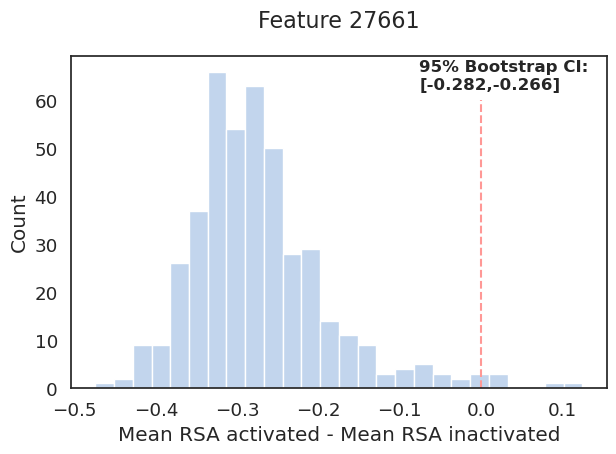

In [18]:
feature_idx = 27661
ax = sns.histplot(res[feature_idx], color=base_cmap(1))
ax.vlines(x=0, ymin=0, ymax=60, linestyles="dashed", colors=base_cmap(7))
ax.set_xlabel("Mean RSA activated - Mean RSA inactivated")
lower, upper = bootstrap_single(res[feature_idx].dropna().values)
ymin, ymax = ax.get_ylim()
y_text = ymax - (ymax - ymin) * 0.1
xmin, xmax = ax.get_xlim()
x_text = xmax - (xmax - xmin) * 0.35
ax.text(
    x=x_text,
    y=y_text,
    s=f"95% Bootstrap CI:\n[{lower:.3f},{upper:.3f}]",
    fontdict={"fontsize": 12, "fontweight": "bold"},
)
ax.set_title(f"Feature {feature_idx}", fontsize=16, y=1.06)
plt.tight_layout()
plt.show()

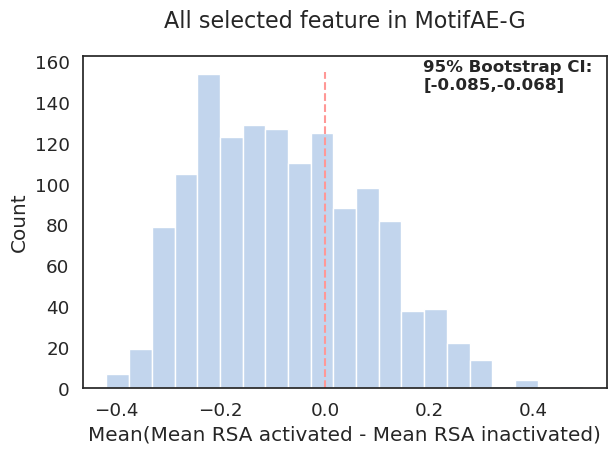

In [19]:
ax = sns.histplot(res.mean(skipna=True), color=base_cmap(1))
ax.vlines(x=0, ymin=0, ymax=155, linestyles="dashed", colors=base_cmap(7))
ax.set_xlabel("Mean(Mean RSA activated - Mean RSA inactivated)")
lower, upper = bootstrap_single(res.mean(skipna=True).dropna().values)
ymin, ymax = ax.get_ylim()
y_text = ymax - (ymax - ymin) * 0.1
xmin, xmax = ax.get_xlim()
x_text = xmax - (xmax - xmin) * 0.35
ax.text(
    x=x_text,
    y=y_text,
    s=f"95% Bootstrap CI:\n[{lower:.3f},{upper:.3f}]",
    fontdict={"fontsize": 12, "fontweight": "bold"},
)
ax.set_title(f"All selected feature in {GATE_MODEL_NAME}", fontsize=16, y=1.06)
plt.tight_layout()
plt.show()

## structure visualize

In [20]:
stab_label_pos_average = stab_metadata.groupby("domainID").apply(lambda x: x[["score", "pos"]].groupby("pos").mean())

In [21]:
def visualize_stab(domain_idx, *activation_lists, unactivate_color, activation_cmap, stab_cmap, show_sidechain=True):

    stab_score = stab_label_pos_average.loc[domain_idx]
    stab_norm = mcolors.TwoSlopeNorm(vmin=stab_score.min().item(), vcenter=0, vmax=stab_score.max().item())

    # get pdb
    pdb_path = f"{STAB_STRUC_BASE}/{domain_idx}.pdb"
    with open(pdb_path, "r") as f:
        pdb_data = f.read()

    # visualize protein
    panel_num = 1 + len(activation_lists)

    view = py3Dmol.view(width=1000, height=600, linked=True, viewergrid=(1, panel_num))
    for i in range(panel_num):
        view.addModel(pdb_data, "pdb", viewer=(0, i))

    # we first color stab score
    seq_len = activation_lists[0].shape[0]
    for i in range(seq_len):
        resi = i + 1
        try:
            score = stab_score.loc[resi].item()
        except:
            score = 0

        rgba = stab_cmap(stab_norm(score))
        color = mcolors.rgb2hex(rgba)

        view.setStyle({"resi": resi}, {"cartoon": {"color": color}}, viewer=(0, 0))

    for j, activation_list in enumerate(activation_lists):
        activation_norm = mcolors.Normalize(vmin=0, vmax=max(activation_list) if max(activation_list) > 0 else 1)
        ## activation
        activated_pos = np.where(activation_list > 0)[0] + 1

        for i, activation in enumerate(activation_list):
            resi = i + 1
            if not resi in activated_pos:
                color = unactivate_color
                view.setStyle({"resi": resi}, {"cartoon": {"color": color}}, viewer=(0, j + 1))

            else:
                rgba = activation_cmap(activation_norm(activation))
                color = mcolors.rgb2hex(rgba)
                if show_sidechain:
                    view.setStyle(
                        {"resi": resi},
                        {
                            "cartoon": {"color": color},
                            "stick": {"color": color, "radius": 0.15},
                        },
                        viewer=(0, j + 1),
                    )
                else:
                    view.setStyle({"resi": resi}, {"cartoon": {"color": color}}, viewer=(0, j + 1))

    for i in range(panel_num):
        view.zoomTo({"chain": "A"}, viewer=(0, i))
        view.zoom(1.2, viewer=(0, i))
        view.setViewStyle({"style": "outline"}, viewer=(0, i))

    view.show()

In [22]:
domain_id = "Q15365_PF00013_278"
feature_idx = 27661
visualize_stab(
    domain_id,
    feature_dict[domain_id][:, feature_idx],
    unactivate_color=unactivate_color,
    activation_cmap=activation_cmap,
    stab_cmap=stab_cmap,
)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [23]:
domain_id = "O14936_PF00595_488"
feature_idx = 27661
visualize_stab(
    domain_id,
    feature_dict[domain_id][:, feature_idx],
    unactivate_color=unactivate_color,
    activation_cmap=activation_cmap,
    stab_cmap=stab_cmap,
)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [24]:
domain_id = "P35711_PF00505_557"
feature_idx = 27661
visualize_stab(
    domain_id,
    feature_dict[domain_id][:, feature_idx],
    unactivate_color=unactivate_color,
    activation_cmap=activation_cmap,
    stab_cmap=stab_cmap,
)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.